In [18]:
import hats_import
from hats_import.catalog.arguments import ImportArguments
from dask.distributed import Client
from hats_import.pipeline import pipeline_with_client
import glob
import lsdb

In [19]:
args = ImportArguments(
    # sort_columns="expid",
    ra_column="ra",
    dec_column="dec",
    input_file_list = glob.glob("ztf_dr23/t_795_zr_c01_o_q1/ztf_*.fits"),
    # input_file_list = ['ztf_dr23/ztf_20180708202211_000795_zr_c11_o_q4_psfcat.fits'], # test file for query and curl method
    file_reader='fits', # hats_import.catalog.file_readers.FitsReader(fits_kwargs={'ignore_missing_simple': True})
    output_artifact_name="TEST_795_zr_c01_o_q1_all",
    output_path="./output",
    resume=False,
)

In [20]:
client = Client(n_workers=4)

In [21]:
pipeline_with_client(args, client)

Planning  :   0%|          | 0/4 [00:00<?, ?it/s]

Mapping   :   0%|          | 0/1688 [00:00<?, ?it/s]

Binning   :   0%|          | 0/2 [00:00<?, ?it/s]

Splitting :   0%|          | 0/1688 [00:00<?, ?it/s]

Reducing  :   0%|          | 0/27 [00:00<?, ?it/s]

Finishing :   0%|          | 0/5 [00:00<?, ?it/s]

In [22]:
test_cat = lsdb.open_catalog("output\TEST_795_zr_c01_o_q1_all")

In [23]:
print(len(test_cat))
test_cat.head()

12169415


,sourceid,xpos,ypos,ra,dec,flux,sigflux,mag,sigmag,snr,chi,sharp,flags
_healpix_29,,,,,,,,,,,,,
706640038511694154,5976,462.752991,3065.052002,252.416743,51.854129,148.744644,28.166969,-5.431,0.206,5.28,0.911,-0.041,0
706640111120364455,2851,554.098999,3053.181885,252.371079,51.858007,160.958694,34.00819,-5.517,0.229,4.73,0.598,0.034,0
706640111301357200,5972,563.877014,3059.444092,252.371097,51.858123,123.70636,20.645523,-5.231,0.181,5.99,0.407,-0.095,0
706640130168008622,3592,465.303009,3067.528076,252.415799,51.854609,153.489319,49.592205,-5.465,0.351,3.1,1.158,-0.193,0
706640138273791634,10795,471.709991,3077.006104,252.406545,51.859292,44.980431,13.112123,-4.133,0.317,3.43,0.45,-0.01,0


C:\Users\lupin\OneDrive\Desktop\LINCC\hats\src\hats\inspection\visualize_catalog.py:298: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - TEST_795_zr_c01_o_q1_all'}>)

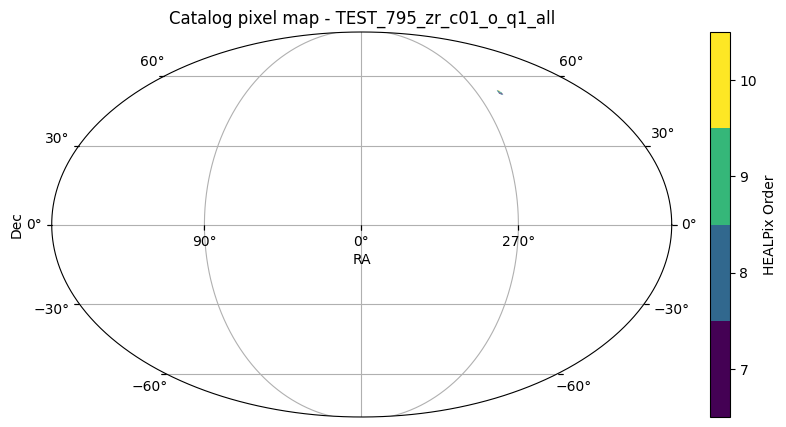

In [24]:
test_cat.plot_pixels()

(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Points in the TEST_795_zr_c01_o_q1_all catalog'}>)

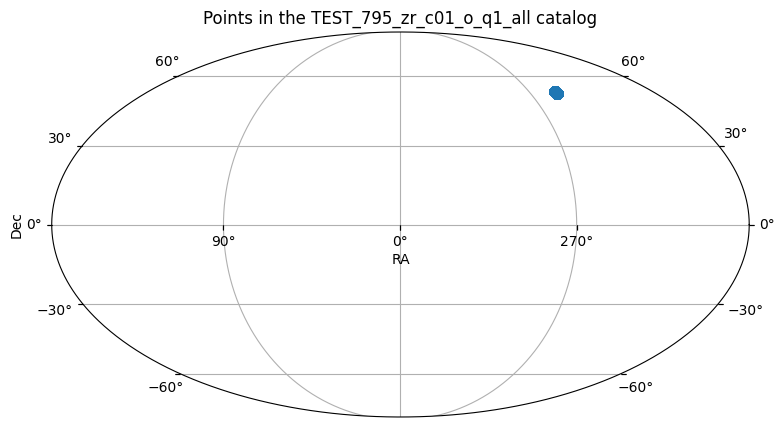

In [25]:
test_cat.plot_points()

In [26]:
client.close()